# I] Import and options


In [2]:
import pandas, numpy, seaborn
# import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
# this is a trick to make figures look nicer
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':10, 'figure.figsize':(12, 8)})

In [3]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# II] DL data

In [4]:
experimentN = 'exp7'

In [5]:
%%time
path = input_file_directory + "mefs/mefs_seahorse_data/ocr/experiment_7/normalized/exp7_ocr_norm.csv"
ocr_normalized = pandas.read_csv(path, sep = ";")
ocr_normalized = ocr_normalized.rename(columns = {'Unnamed: 0':'Time'})
ocr_normalized = ocr_normalized.apply(lambda x: x.str.replace(',','.'))
ocr_normalized = ocr_normalized.astype(float)
print(ocr_normalized.shape)
ocr_normalized.head(2)

(15, 61)
Wall time: 39.9 ms


,Time,B02,C02,D02,E02,F02,G02,B03,C03,D03,...,D10,E10,F10,G10,B11,C11,D11,E11,F11,G11
0,1.31,22.99,17.08,14.19,17.42,17.48,16.62,14.49,19.18,18.09,...,22.69,19.51,20.62,21.24,15.82,14.92,13.23,11.97,11.27,18.32
1,7.76,23.59,17.82,15.33,18.97,18.24,17.50,15.50,19.81,18.94,...,22.98,20.07,21.25,23.19,16.86,17.81,15.57,14.08,12.76,19.97


In [6]:
#define the wells for each condition
normal = ['B02','C02','D02','E02','F02','G02']
ev_nodox = ['B03','C03','D03','E03','F03','G03']
ev = ['B04','C04','D04','E04','F04','G04']
wt1 = ['B05','C05','D05','E05','F05','G05']
wt2 = ['B06','C06','D06','E06','F06','G06']

normal_baf = ['B07','C07','D07','E07','F07','G07']
ev_nodox_baf = ['B08','C08','D08','E08','F08','G08']
ev_baf = ['B09','C09','D09','E09','F09','G09']
wt1_baf = ['B10','C10','D10','E10','F10','G10']
wt2_baf = ['B11','C11','D11','E11','F11','G11']

findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.


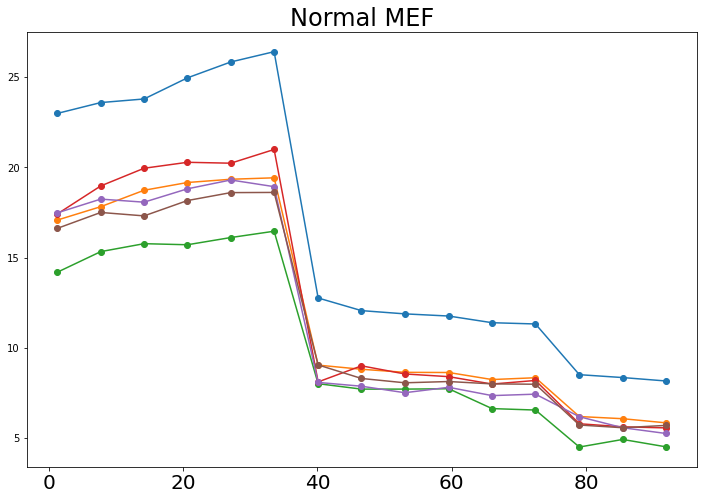

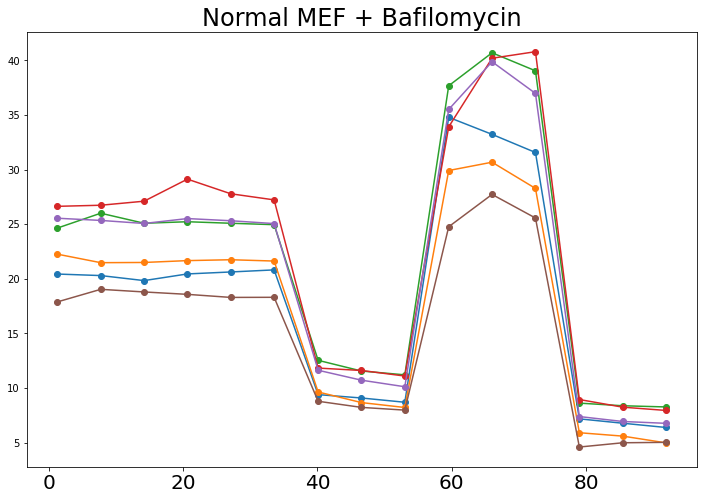

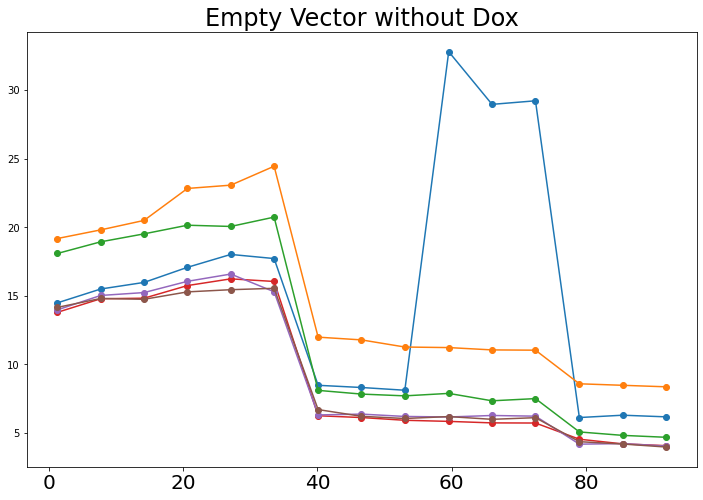

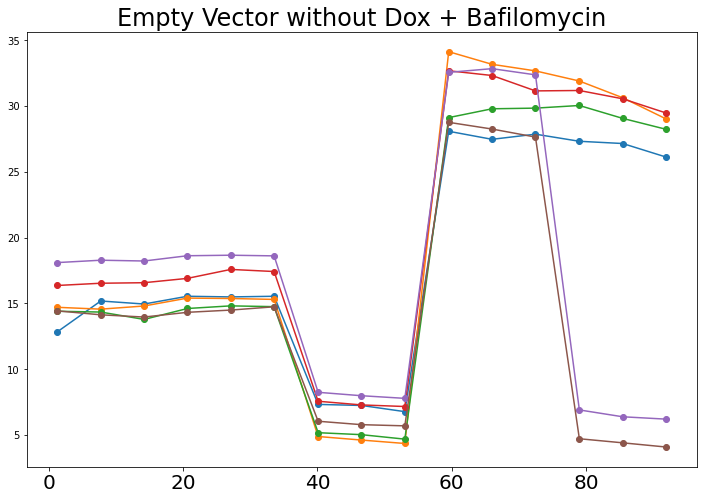

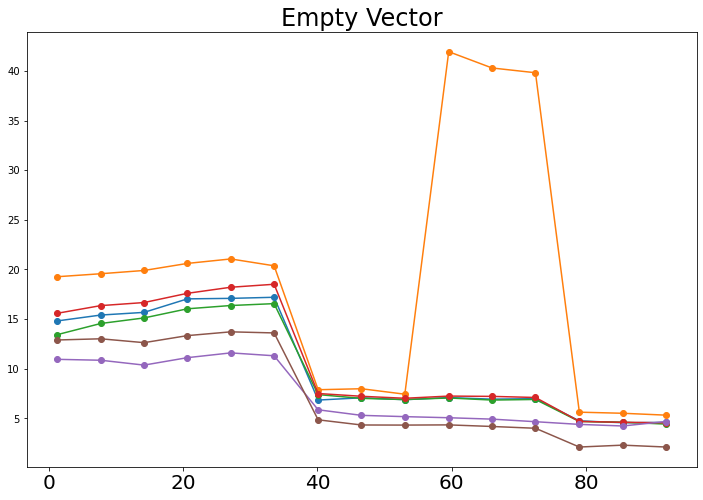

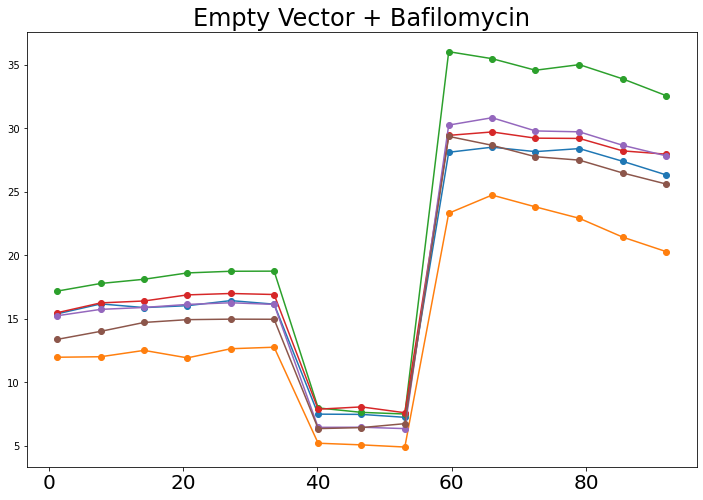

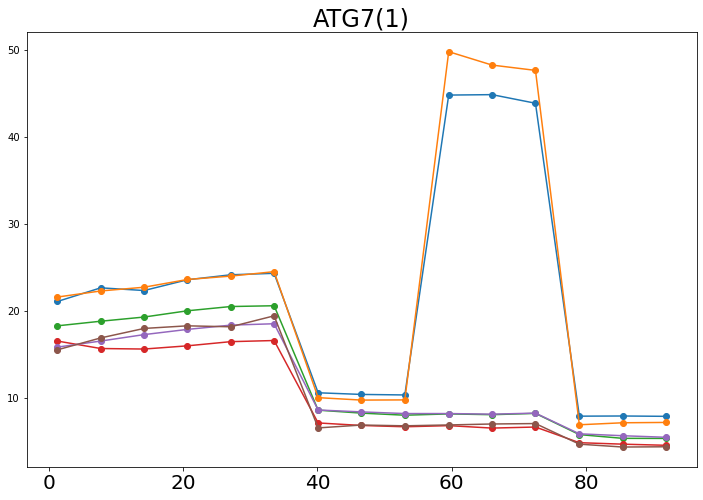

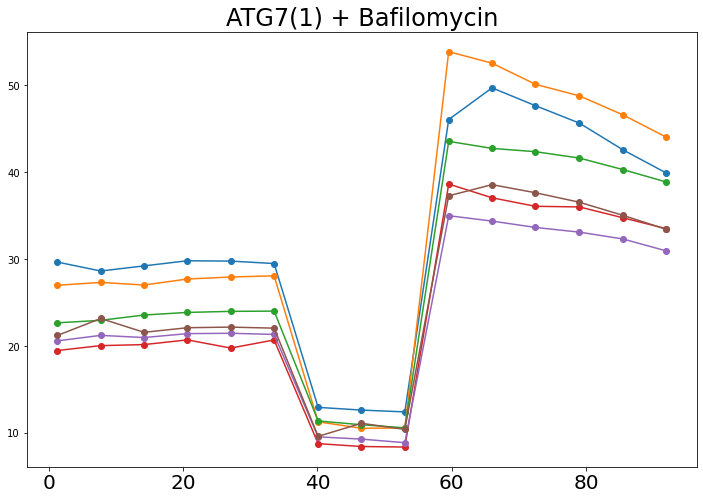

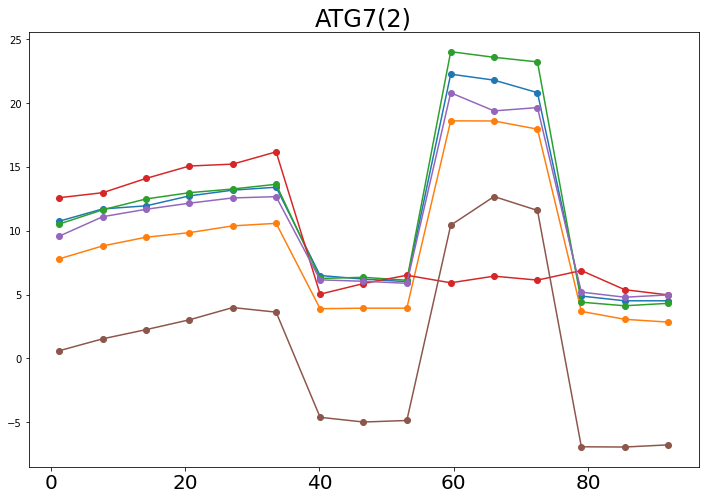

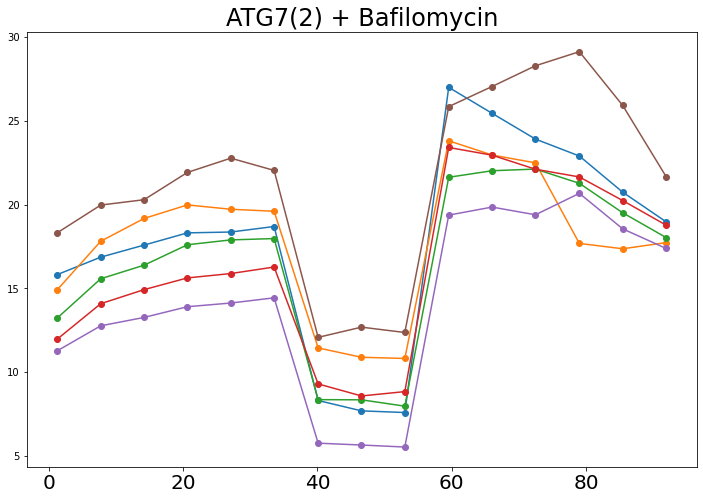

<Figure size 864x576 with 0 Axes>

In [7]:
#Visualization of all data
all_data = [[normal, 'Normal MEF'], [normal_baf, 'Normal MEF + Bafilomycin'],
            [ev_nodox, 'Empty Vector without Dox'], [ev_nodox_baf, 'Empty Vector without Dox + Bafilomycin'],
            [ev, 'Empty Vector'], [ev_baf, 'Empty Vector + Bafilomycin'],
            [wt1, 'ATG7(1)'], [wt1_baf, 'ATG7(1) + Bafilomycin'],
            [wt2, 'ATG7(2)'], [wt2_baf, 'ATG7(2) + Bafilomycin']]
        
for data in all_data:
    ##graph
    name = data[1]
    plt.plot(ocr_normalized['Time'], ocr_normalized[data[0]], 'o-')
    plt.title(name)
   
    plt.show()
    plt.clf()
    print()

In [8]:
#define the wells for each condition
normal = ['B02']
ev_nodox = ['B03']
ev = ['C04']
wt1 = ['B05','C05']
wt2 = ['B06','C06','D06','F06']

normal_baf = ['B07','C07','D07','E07','F07','G07']
ev_nodox_baf = ['B08','C08','D08','E08','F08','G08']
ev_baf = ['B09','C09','D09','E09','F09','G09']
wt1_baf = ['B10','C10','D10','E10','F10','G10']
wt2_baf = ['B11','C11','D11','E11','F11','G11']

findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.


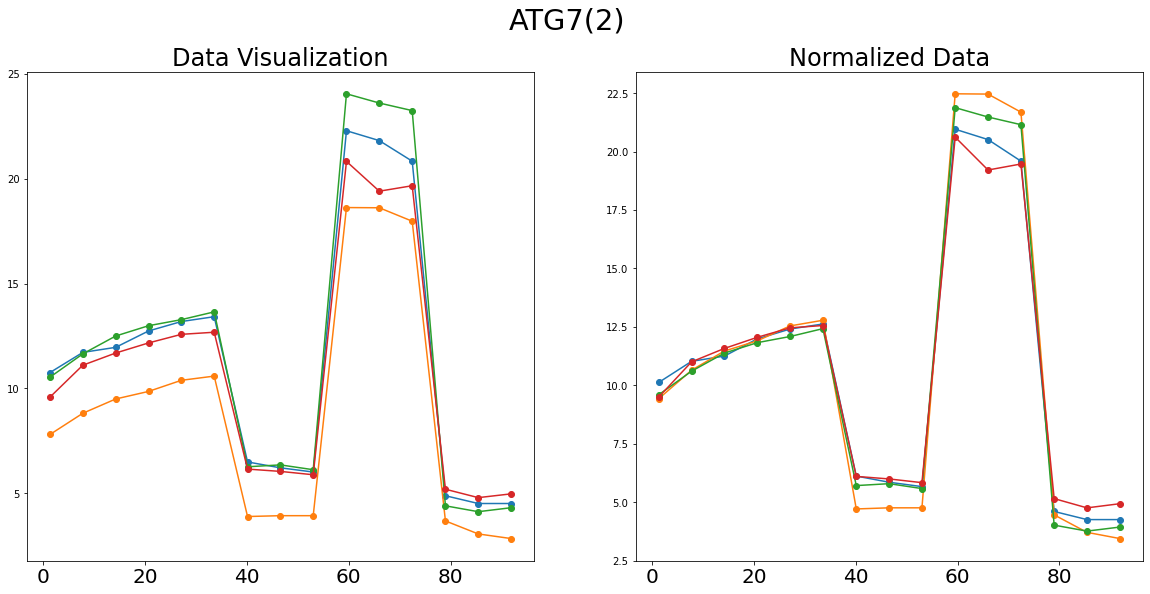

<Figure size 864x576 with 0 Axes>

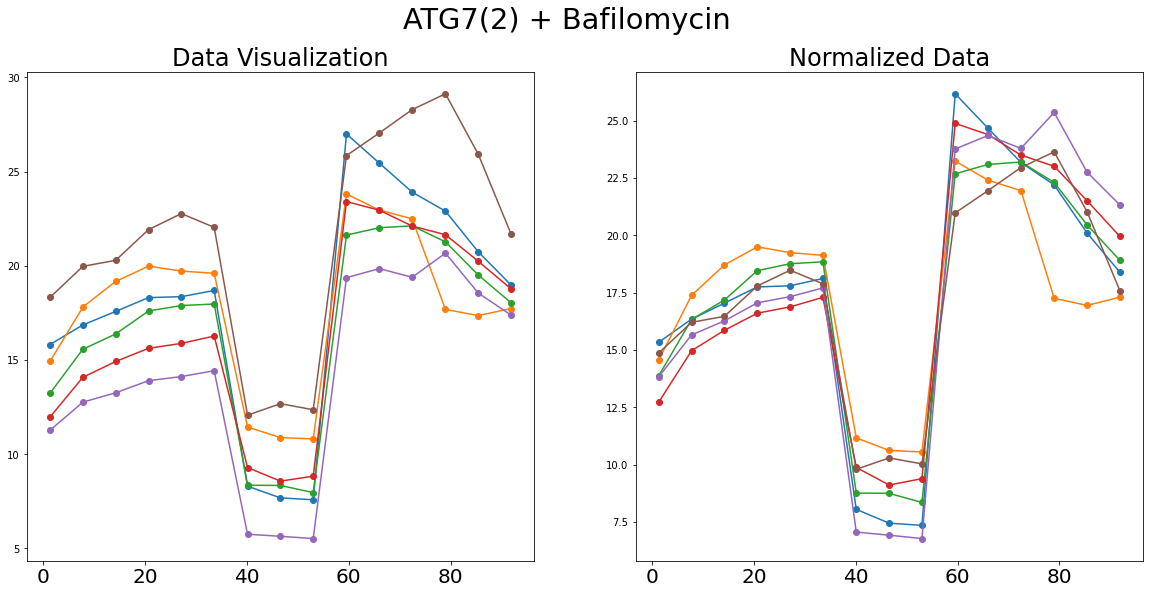

<Figure size 864x576 with 0 Axes>

In [9]:
#Normalization of the data after removing bad wells
all_data = [[wt2, 'ATG7(2)'], [wt2_baf, 'ATG7(2) + Bafilomycin']]
        
for data in all_data:
    ##setting graphs
    name = data[1]
    fig, ax = plt.subplots(1,2, figsize=(20,9))
    fig.suptitle(name, fontsize="x-large")
    
    ##graph1
    ax[0].plot(ocr_normalized['Time'], ocr_normalized[data[0]], 'o-')
    ax[0].set_title("Data Visualization")
    
    ##normalization
    shift = ocr_normalized[data[0]].mean()
    general_mean = ocr_normalized[data[0]].mean().mean()
    relative_mu = shift/general_mean
    
    normalized_data = ocr_normalized[data[0]]/relative_mu
    
    ##graph2
    ax[1].plot(ocr_normalized['Time'], normalized_data, 'o-')
    ax[1].set_title("Normalized Data")
    
    plt.show()
    plt.clf()
    print()

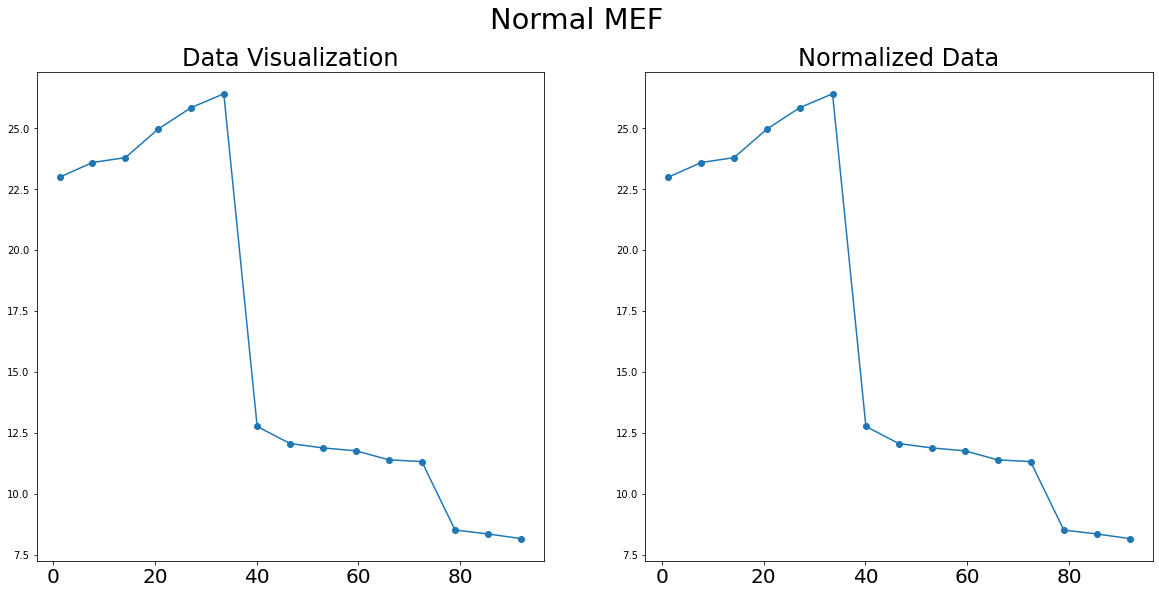

<Figure size 864x576 with 0 Axes>

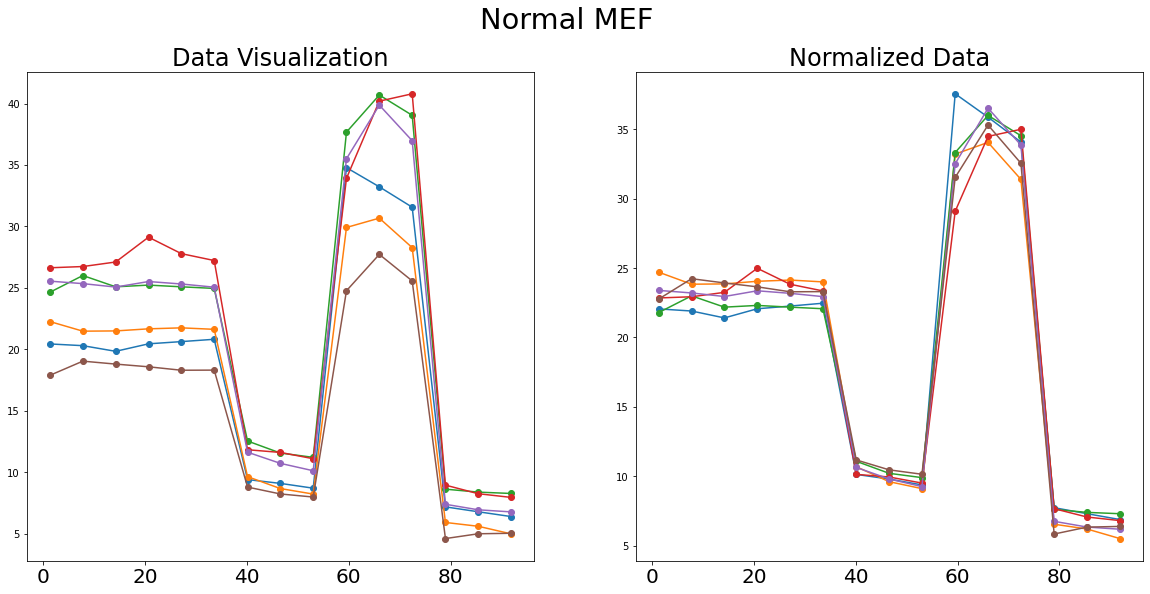

<Figure size 864x576 with 0 Axes>

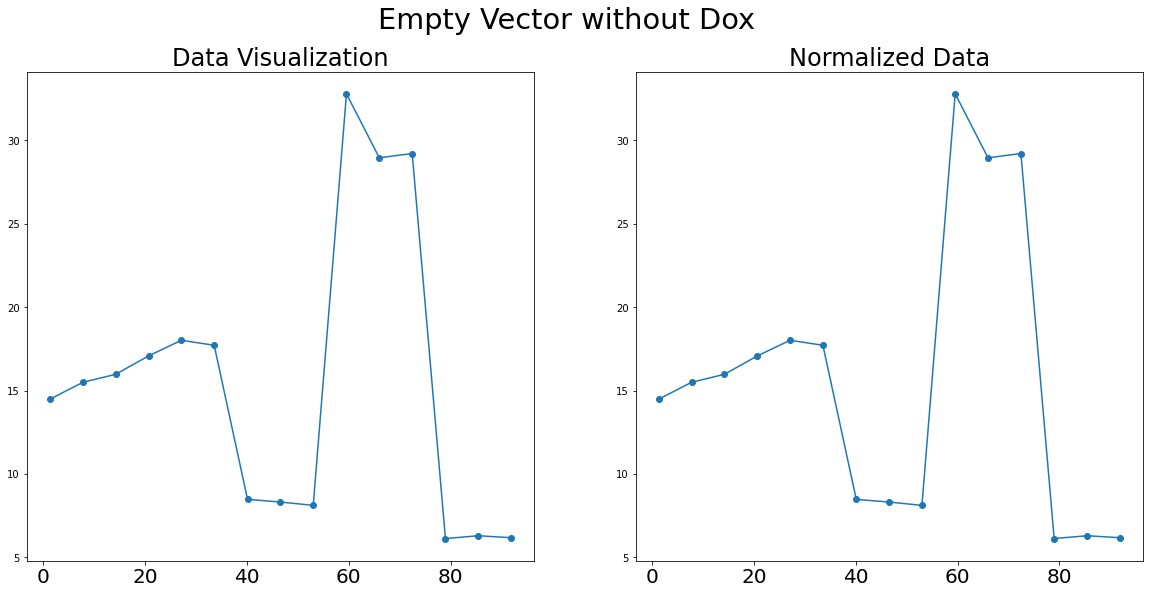

<Figure size 864x576 with 0 Axes>

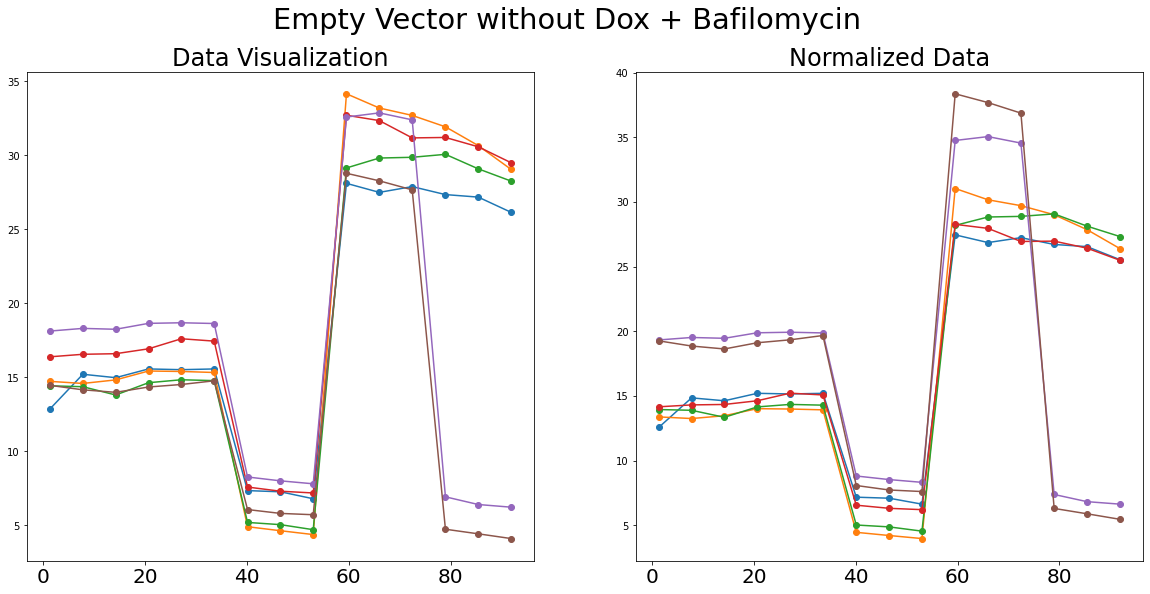

<Figure size 864x576 with 0 Axes>

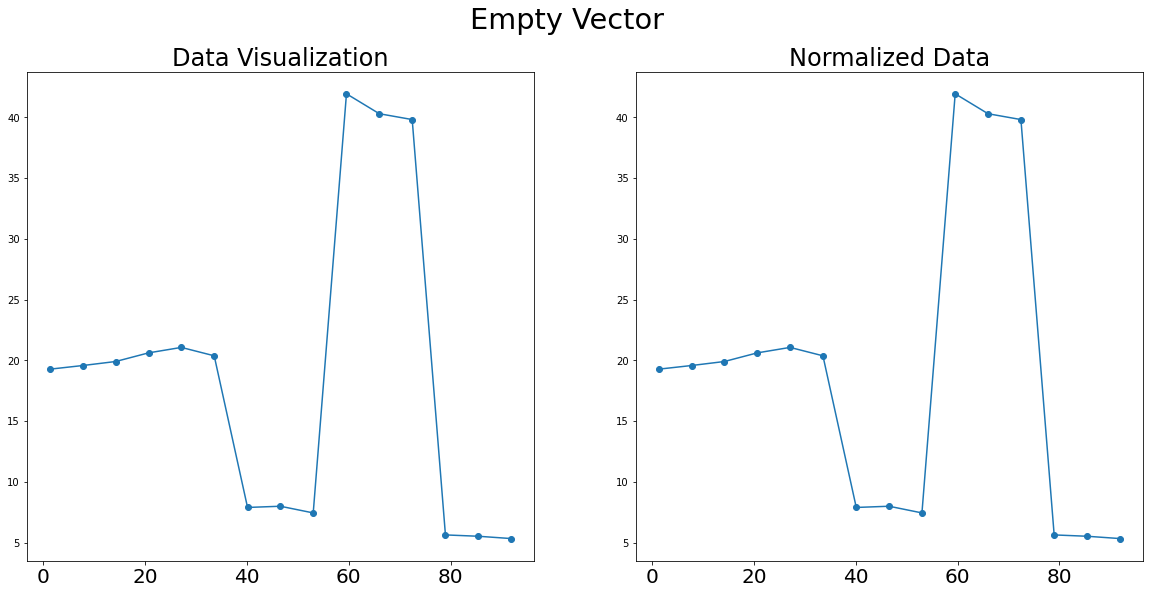

<Figure size 864x576 with 0 Axes>

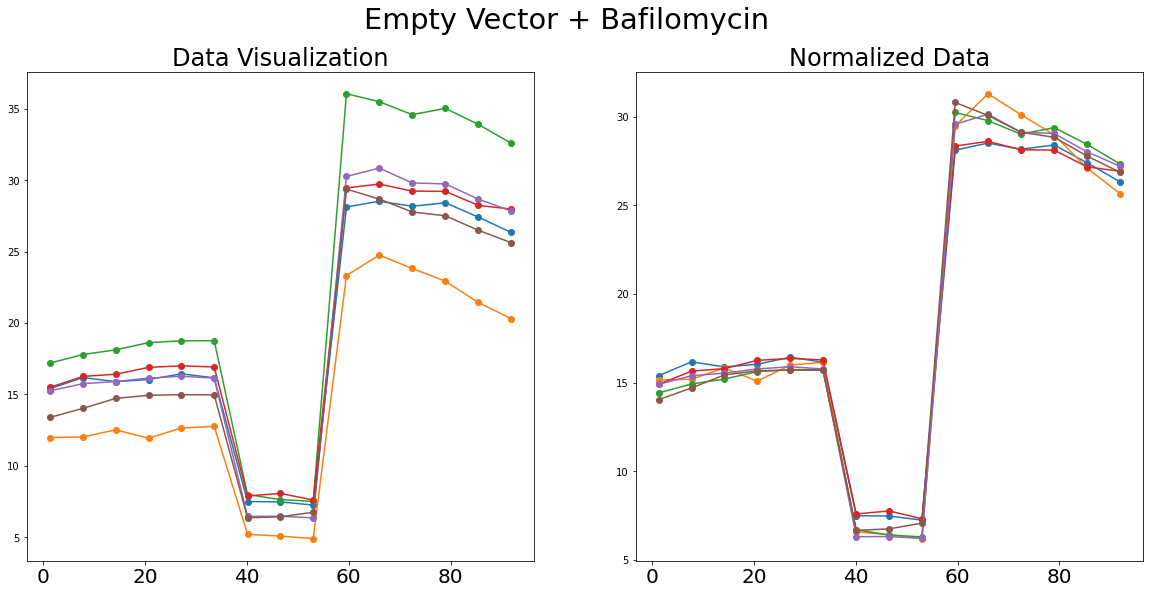

<Figure size 864x576 with 0 Axes>

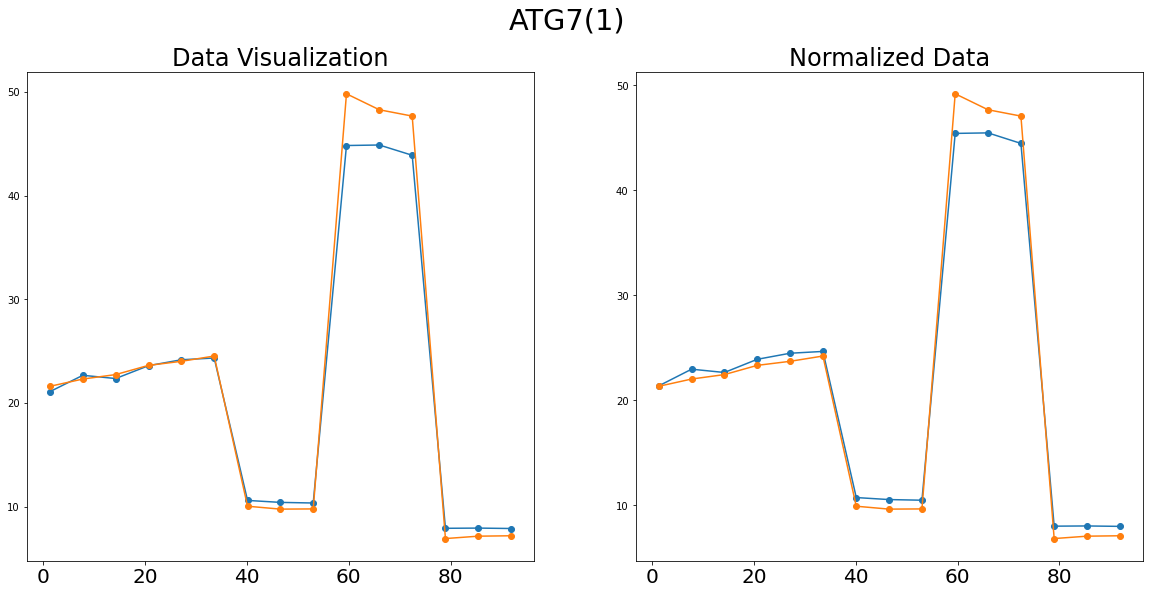

<Figure size 864x576 with 0 Axes>

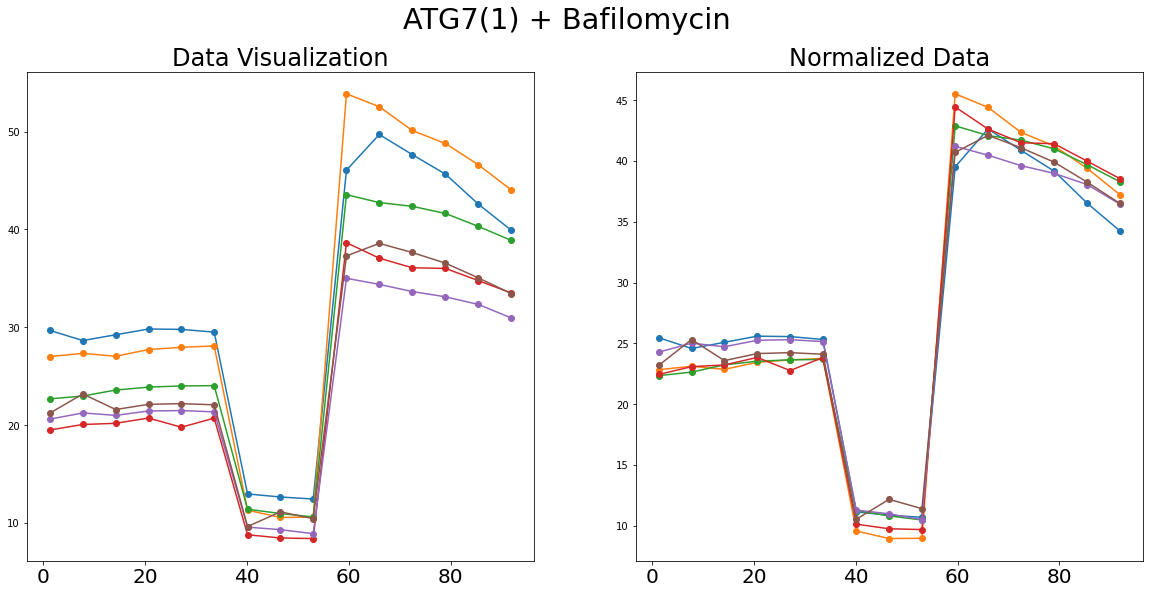

<Figure size 864x576 with 0 Axes>

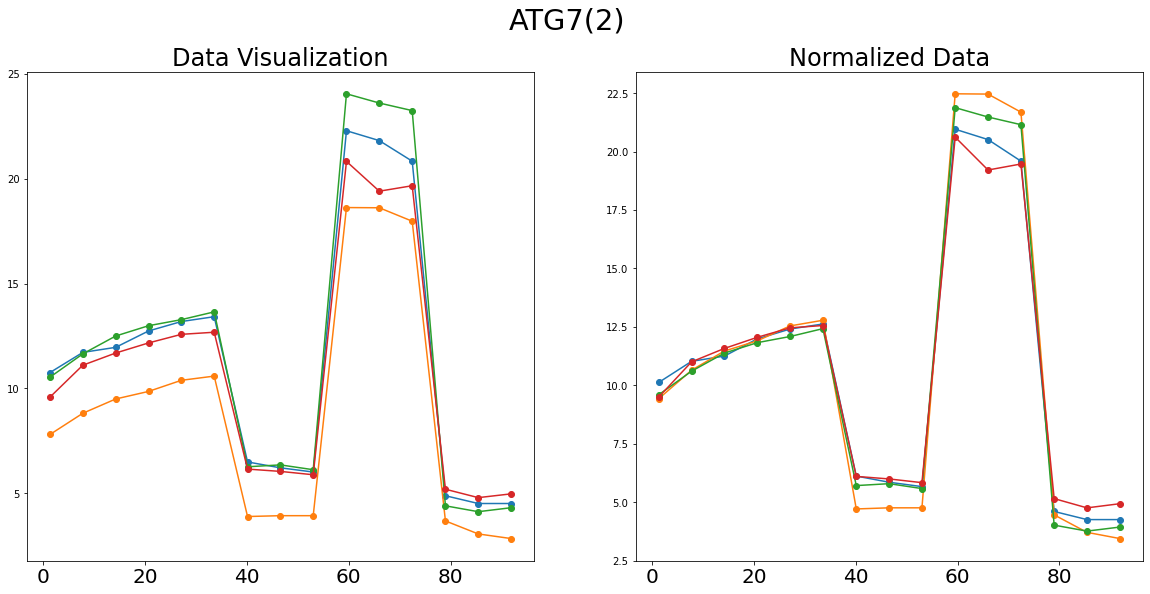

<Figure size 864x576 with 0 Axes>

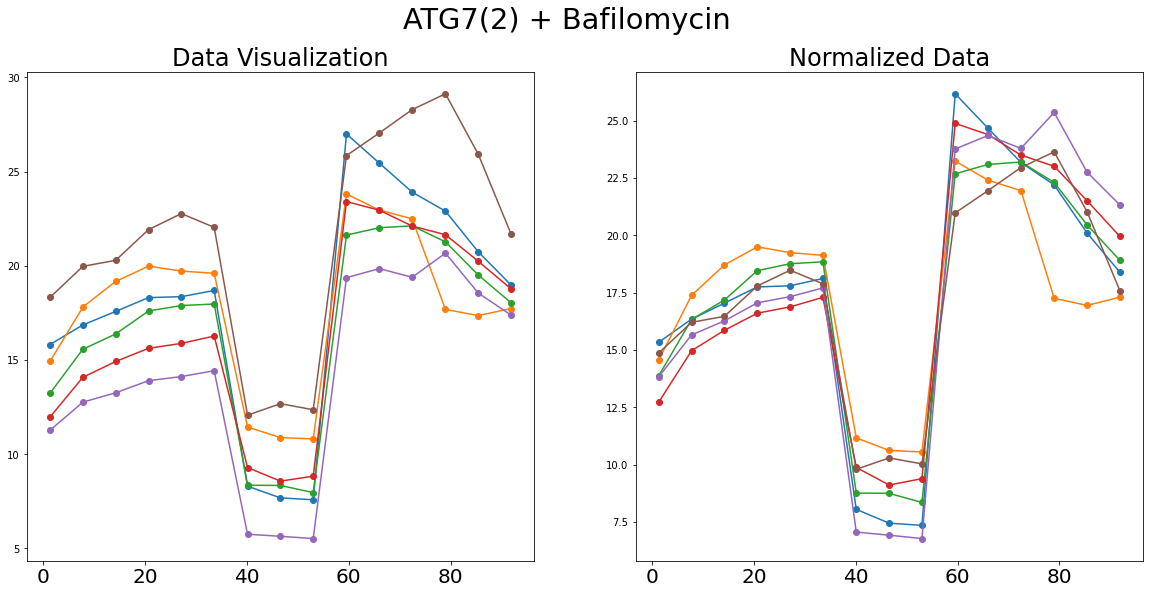

<Figure size 864x576 with 0 Axes>

In [10]:
#Normalization of the data after removing bad wells
all_data = [[normal, 'Normal MEF', "navy"], [normal_baf, 'Normal MEF', "royalblue"],
            [ev_nodox, 'Empty Vector without Dox'], [ev_nodox_baf, 'Empty Vector without Dox + Bafilomycin'],
            [ev, 'Empty Vector'], [ev_baf, 'Empty Vector + Bafilomycin'],
            [wt1, 'ATG7(1)'], [wt1_baf, 'ATG7(1) + Bafilomycin'],
            [wt2, 'ATG7(2)'], [wt2_baf, 'ATG7(2) + Bafilomycin']]
        
for data in all_data:
    ##setting graphs
    name = data[1]
    fig, ax = plt.subplots(1,2, figsize=(20,9))
    fig.suptitle(name, fontsize="x-large")
    
    ##graph1
    ax[0].plot(ocr_normalized['Time'], ocr_normalized[data[0]], 'o-')
    ax[0].set_title("Data Visualization")
    
    ##normalization
    shift = ocr_normalized[data[0]].mean()
    general_mean = ocr_normalized[data[0]].mean().mean()
    relative_mu = shift/general_mean
    
    normalized_data = ocr_normalized[data[0]]/relative_mu
    
    ##graph2
    ax[1].plot(ocr_normalized['Time'], normalized_data, 'o-')
    ax[1].set_title("Normalized Data")
    
    plt.show()
    plt.clf()
    print()

C:\Users\kja11\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
C:\Users\kja11\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


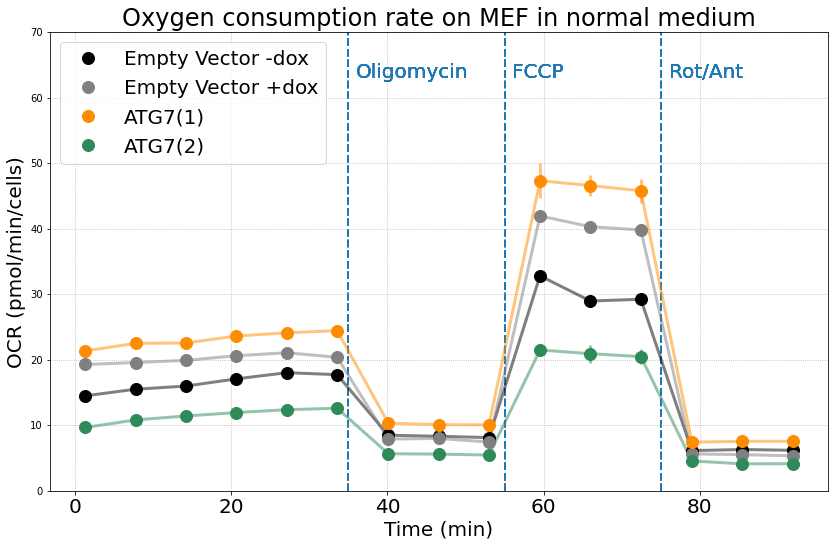

C:\Users\kja11\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
C:\Users\kja11\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


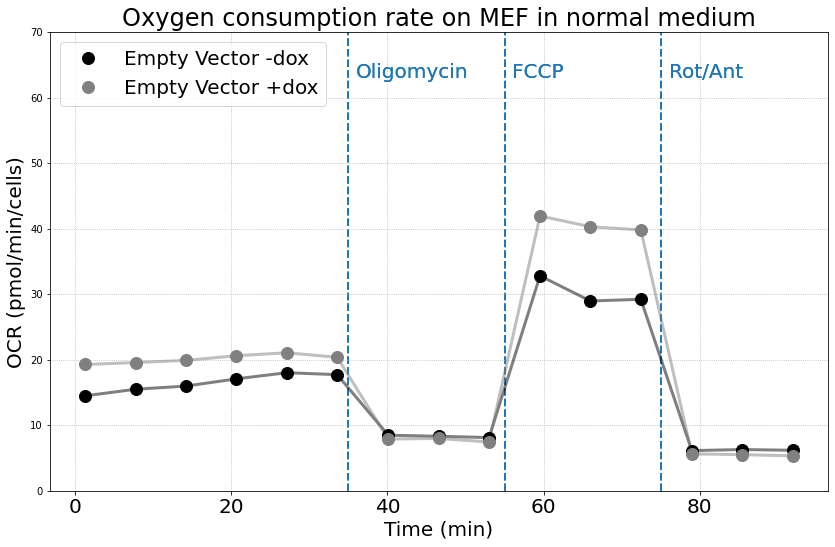

C:\Users\kja11\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


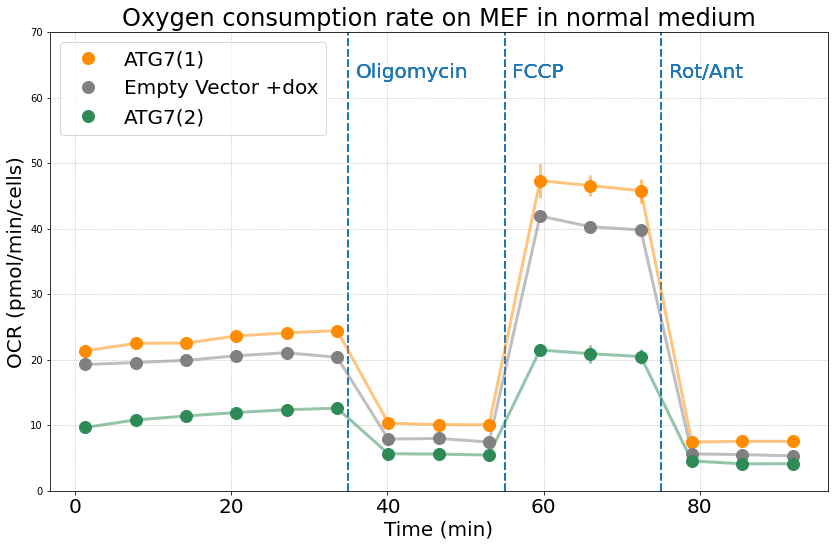

<Figure size 864x576 with 0 Axes>

In [11]:
#Normalization of the data after removing bad wells
##WITHOUT BAFILOMYCIN
all_data = [[ev_nodox, 'Empty Vector -dox', "black"],
            [ev, 'Empty Vector +dox', 'grey'],
            [wt1, 'ATG7(1)', 'darkorange'],
            [wt2, 'ATG7(2)', "seagreen"]]

all_control= [[ev_nodox, 'Empty Vector -dox', "black"],
              [ev, 'Empty Vector +dox', 'grey']]

all_isof = [[wt1, 'ATG7(1)', 'darkorange'],
            [ev, 'Empty Vector +dox', "grey"],
            [wt2, 'ATG7(2)', "seagreen"]]

contr_condit = all_data, all_control, all_isof

for data_ in contr_condit:
    for data in data_:
        ##setting graphs
        name_val = data[1]
        color_val = data[2]

        ##normalization
        shift = ocr_normalized[data[0]].mean()
        general_mean = ocr_normalized[data[0]].mean().mean()
        relative_mu = shift/general_mean
        normalized_data = ocr_normalized[data[0]]/relative_mu

        ##define mean and standard deviation
        mean = normalized_data.mean(axis=1)
        std = normalized_data.std(axis=1)

        ##plot graph
        plt.errorbar(ocr_normalized['Time'], mean, std, lw=3, color=color_val, alpha=1/2)
        plt.plot(ocr_normalized['Time'], mean, 'o', color=color_val, ms=12, label=name_val, zorder=999)

        matplotlib.pyplot.grid(ls=':')

        ##add vertical lines
        matplotlib.pyplot.axvline(x=35, ls='--', lw=2, color='tab:blue', zorder=1)
        matplotlib.pyplot.axvline(x=55, ls='--', lw=2, color='tab:blue', zorder=1)
        matplotlib.pyplot.axvline(x=75, ls='--', lw=2, color='tab:blue', zorder=1)

        ##add texts
        matplotlib.pyplot.text(36, 63, 'Oligomycin', color='tab:blue')
        matplotlib.pyplot.text(56, 63, 'FCCP', color='tab:blue')
        matplotlib.pyplot.text(76, 63, 'Rot/Ant', color='tab:blue')

        ##settings
        matplotlib.pyplot.title('Oxygen consumption rate on MEF in normal medium')
        matplotlib.pyplot.xlabel('Time (min)')
        matplotlib.pyplot.ylabel('OCR (pmol/min/cells)')
        matplotlib.pyplot.legend(loc=2)
        matplotlib.pyplot.ylim([0, 70])
        matplotlib.pyplot.tight_layout()

    plt.show()
    plt.clf()

In [12]:
#data preparation
sample_labels = wt2, wt1, ev, ev_nodox
name_conditions = 'ATG7(2)','ATG7(1)','Empty Vector +dox','Empty Vector -dox'
color_conditions = "seagreen", 'darkorange', 'grey', "royalblue"

stats_data_basal = ocr_normalized.iloc[:6, :]
stats_data_max = ocr_normalized.iloc[9:12, :]

dfs = stats_data_basal, stats_data_max
infos = 'basal', 'maximum'

#basal and maximal selection
for i in range(len(dfs)):
    df = dfs[i]
    info = infos[i]
    
    df.reset_index(inplace = True, drop= True)
    
    #conditions selection
    for j in range(len(sample_labels)):
        ##setting graphs
        sample_label = sample_labels[j]
        name_condition = name_conditions[j]
        color_condition = color_conditions[j]

        #for each conditon:
        ##select the value per condition
        df_ephemeral = pandas.DataFrame()
        df_ephemeral[sample_label]  = df[sample_label]
        ##add mean column for this condition
        df_ephemeral[name_condition] = df_ephemeral.mean(axis= 1)
        ##pop this column
        col = df_ephemeral.pop(name_condition)
        ##insert it in position 1 in  the full dataframe
        df.insert(1, name_condition, col)
        
    #Select the inserted collumns only
    df = df.iloc[:, :5]

    path = 'ATG7/MEF/Seahorse_results/seahorse_OCR/dataframes_for_input/'
    file_name = f'ocr_{experimentN}_df_dmso_{info}.csv'
    df.to_csv(output_file_directory+path+file_name, header=True, index=False, sep=',')
    print(df.iloc[:,1:])

   Empty Vector -dox  Empty Vector +dox  ATG7(1)  ATG7(2)
0              14.49              19.27   21.355   9.6750
1              15.50              19.57   22.490  10.8250
2              15.98              19.90   22.550  11.4125
3              17.08              20.61   23.615  11.9400
4              18.02              21.06   24.095  12.3600
5              17.72              20.37   24.435  12.5850
   Empty Vector -dox  Empty Vector +dox  ATG7(1)  ATG7(2)
0              32.80              41.93   47.335   21.440
1              28.96              40.29   46.590   20.855
2              29.22              39.81   45.790   20.425


In [13]:
#data preparation 
all_data = [[wt2, 'ATG7(2)', "seagreen"],
            [wt1, 'ATG7(1)', 'darkorange'],
            [ev, 'Empty Vector +dox', 'grey'],
            [ev_nodox, 'Empty Vector -dox', "black"]]

stats_data = ocr_normalized.iloc[9:12, :]
stats_data.reset_index(inplace = True, drop= True)

for data in all_data:
        ##setting graphs
        sample_labels = data[0]
        name_val = data[1]
        color_val = data[2]
        
        df = stats_data[sample_labels]
        df[name_val] = df.mean(axis= 1)
        col = df.pop(name_val)
        stats_data.insert(1, name_val, col)

stats_data = stats_data.iloc[:, :5]
stats_data

<ipython-input-13-fbbf695daead>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[name_val] = df.mean(axis= 1)


,Time,Empty Vector -dox,Empty Vector +dox,ATG7(1),ATG7(2)
0,59.54,32.80,41.93,47.335,21.440
1,65.99,28.96,40.29,46.590,20.855
2,72.45,29.22,39.81,45.790,20.425


In [14]:
stats_data

,Time,Empty Vector -dox,Empty Vector +dox,ATG7(1),ATG7(2)
0,59.54,32.80,41.93,47.335,21.440
1,65.99,28.96,40.29,46.590,20.855
2,72.45,29.22,39.81,45.790,20.425


In [15]:
# #Boxplot and Stats
# Data = stats_data
# shape = Data.shape
# shape = shape[0]

# #select the sample type column
# Time = {'Time':[Data.iloc[:,1][i]
#   for i in range(0, shape)]}

# #convert to df, and copy it 3 times
# Timedf = pandas.DataFrame(Time)
# Timedf = pandas.concat([Timedf,Timedf,Timedf,Timedf,Timedf])
# Timedf.reset_index(drop=True, inplace=True)

# # Y for expression value 
# y = {'y':[Data.iloc[:,j][i]
#   for j in range(1,4)
#     for i in range(0, shape)]}

# #create df with Y 
# data_distrib = pandas.DataFrame(y)

# # X for ATG7/iso1/iso2                              
# data_distrib.loc[:shape,'x'] = 'Empty Vector \n+dox'
# data_distrib.loc[shape: shape*2,'x'] = 'ATG7(1)'
# data_distrib.loc[shape*2:shape*3,'x'] = 'ATG7(2)'


# #graph
# seaborn.catplot(x="x", y="y", aspect= 1.25,  kind="box", palette = 'Set2', data = data_distrib, 
#               boxprops={'lw':2}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False)

# plt.ylabel('OCR (pmol/min/cells)')
# plt.xlabel('')
# plt.title('OCR rate on MEF', x=.55)
# plt.grid(alpha = 0.5)

# # save
# path = 'ATG7/Seahorse_results/seahorse_OCR/'
# plt.savefig(output_file_directory+path+'ocr_exp_7_normal.svg')

# +BAF

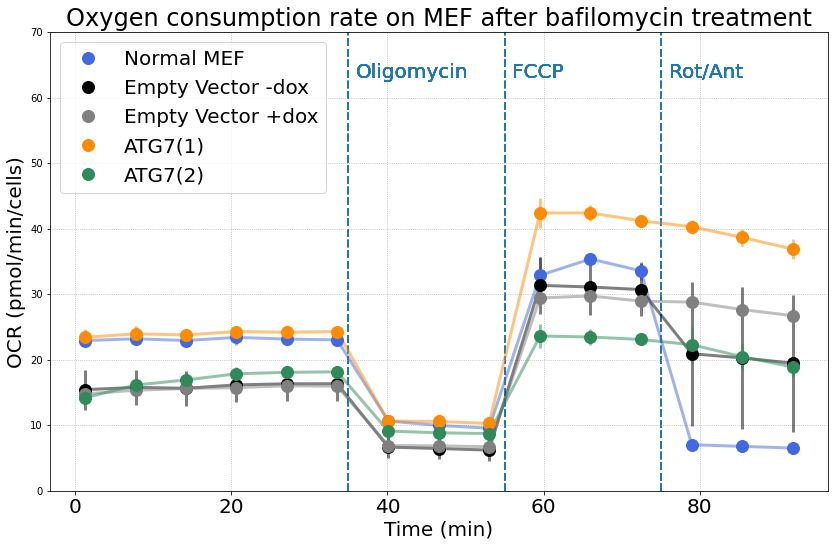

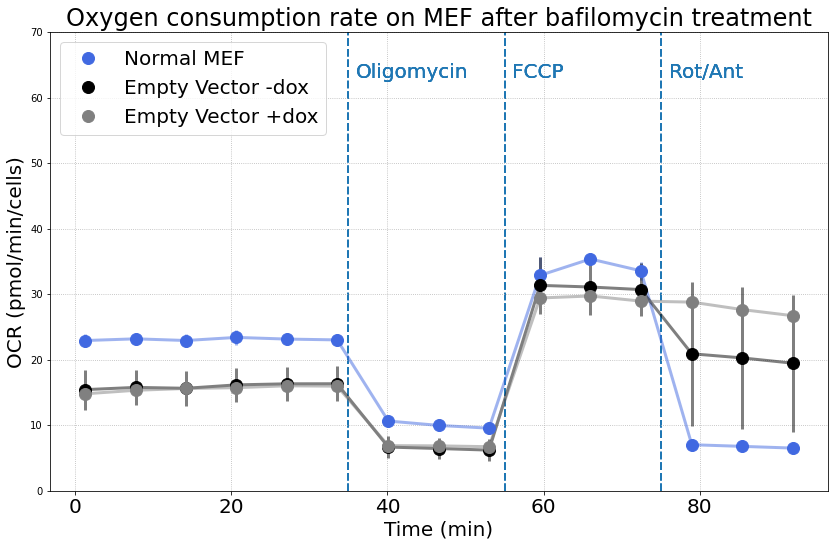

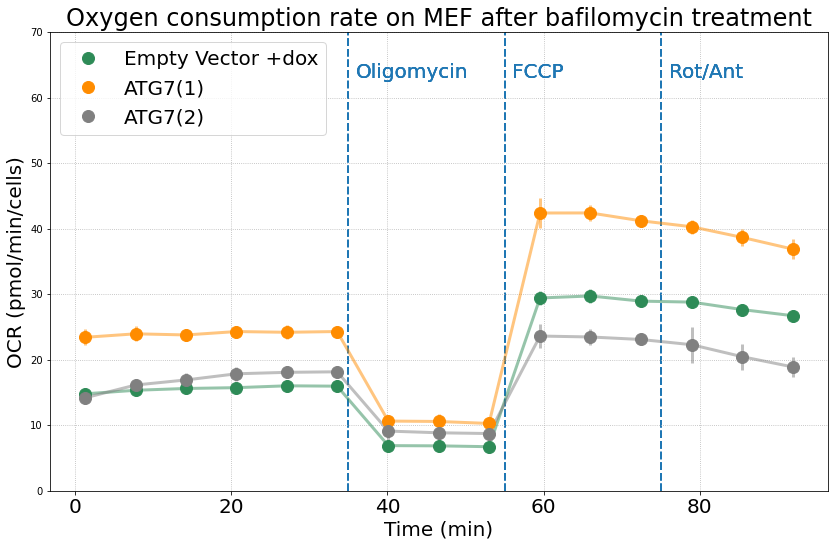

<Figure size 864x576 with 0 Axes>

In [16]:
#Normalization of the data after removing bad wells
##WITH BAFILOMYCIN
all_data = [[normal_baf, 'Normal MEF', "royalblue"],
            [ev_nodox_baf, 'Empty Vector -dox', "black"],
            [ev_baf, 'Empty Vector +dox', 'grey'],
            [wt1_baf, 'ATG7(1)', 'darkorange'],
            [wt2_baf, 'ATG7(2)', "seagreen"]]

all_control= [[normal_baf, 'Normal MEF', "royalblue"],
              [ev_nodox_baf, 'Empty Vector -dox', "black"],
              [ev_baf, 'Empty Vector +dox', 'grey']]

all_isof = [[ev_baf, 'Empty Vector +dox', "seagreen"],
            [wt1_baf, 'ATG7(1)', 'darkorange'],
            [wt2_baf, 'ATG7(2)', "grey"]]

contr_condit = all_data, all_control, all_isof

for data_ in contr_condit:
    for data in data_:
        ##setting graphs
        name_val = data[1]
        color_val = data[2]

        ##normalization
        shift = ocr_normalized[data[0]].mean()
        general_mean = ocr_normalized[data[0]].mean().mean()
        relative_mu = shift/general_mean
        normalized_data = ocr_normalized[data[0]]/relative_mu

        ##define mean and standard deviation
        mean = normalized_data.mean(axis=1)
        std = normalized_data.std(axis=1)

        ##plot graph
        plt.errorbar(ocr_normalized['Time'], mean, std, lw=3, color=color_val, alpha=1/2)
        plt.plot(ocr_normalized['Time'], mean, 'o', color=color_val, ms=12, label=name_val, zorder=999)

        matplotlib.pyplot.grid(ls=':')

        ##add vertical lines
        matplotlib.pyplot.axvline(x=35, ls='--', lw=2, color='tab:blue', zorder=1)
        matplotlib.pyplot.axvline(x=55, ls='--', lw=2, color='tab:blue', zorder=1)
        matplotlib.pyplot.axvline(x=75, ls='--', lw=2, color='tab:blue', zorder=1)

        ##add texts
        matplotlib.pyplot.text(36, 63, 'Oligomycin', color='tab:blue')
        matplotlib.pyplot.text(56, 63, 'FCCP', color='tab:blue')
        matplotlib.pyplot.text(76, 63, 'Rot/Ant', color='tab:blue')

        ##settings
        matplotlib.pyplot.title('Oxygen consumption rate on MEF after bafilomycin treatment')
        matplotlib.pyplot.xlabel('Time (min)')
        matplotlib.pyplot.ylabel('OCR (pmol/min/cells)')
        matplotlib.pyplot.legend(loc=2)
        matplotlib.pyplot.ylim([0, 70])
        matplotlib.pyplot.tight_layout()
               
    plt.show()
    plt.clf()

In [17]:
#data preparation
sample_labels = wt2_baf, wt1_baf, ev_baf, ev_nodox_baf
name_conditions = 'ATG7(2)','ATG7(1)','Empty Vector +dox','Empty Vector -dox'
color_conditions = "seagreen", 'darkorange', 'grey', "royalblue"

stats_data_basal = ocr_normalized.iloc[:6, :]
stats_data_max = ocr_normalized.iloc[9:12, :]

dfs = stats_data_basal, stats_data_max
infos = 'basal', 'maximum'

#basal and maximal selection
for i in range(len(dfs)):
    df = dfs[i]
    info = infos[i]
    
    df.reset_index(inplace = True, drop= True)
    
    #conditions selection
    for j in range(len(sample_labels)):
        ##setting graphs
        sample_label = sample_labels[j]
        name_condition = name_conditions[j]
        color_condition = color_conditions[j]

        #for each conditon:
        ##select the value per condition
        df_ephemeral = pandas.DataFrame()
        df_ephemeral[sample_label]  = df[sample_label]
        ##add mean column for this condition
        df_ephemeral[name_condition] = df_ephemeral.mean(axis= 1)
        ##pop this column
        col = df_ephemeral.pop(name_condition)
        ##insert it in position 1 in  the full dataframe
        df.insert(1, name_condition, col)
        
    #Select the inserted collumns only
    df = df.iloc[:, :5]

    path = 'ATG7/MEF/Seahorse_results/seahorse_OCR/dataframes_for_input/'
    file_name = f'ocr_{experimentN}_df_baf_{info}.csv'
    df.to_csv(output_file_directory+path+file_name, header=True, index=False, sep=',')
    print(df.iloc[:,1:])

   Empty Vector -dox  Empty Vector +dox    ATG7(1)    ATG7(2)
0          15.148333          14.783333  23.458333  14.255000
1          15.513333          15.336667  23.913333  16.175000
2          15.390000          15.593333  23.776667  16.933333
3          15.908333          15.760000  24.293333  17.888333
4          16.076667          16.015000  24.206667  18.123333
5          16.070000          15.953333  24.301667  18.166667
   Empty Vector -dox  Empty Vector +dox    ATG7(1)    ATG7(2)
0          30.898333          29.426667  42.410000  23.511667
1          30.650000          29.665000  42.508333  23.380000
2          30.265000          28.895000  41.258333  23.051667


In [18]:
# #Boxplot and Stats
# Data = stats_data
# shape = Data.shape
# shape = shape[0]

# #select the sample type column
# Time = {'Time':[Data.iloc[:,1][i]
#   for i in range(0, shape)]}

# #convert to df, and copy it 3 times
# Timedf = pandas.DataFrame(Time)
# Timedf = pandas.concat([Timedf,Timedf,Timedf,Timedf,Timedf])
# Timedf.reset_index(drop=True, inplace=True)

# # Y for expression value 
# y = {'y':[Data.iloc[:,j][i]
#   for j in range(1,4)
#     for i in range(0, shape)]}

# #create df with Y 
# data_distrib = pandas.DataFrame(y)

# # X for ATG7/iso1/iso2                              
# data_distrib.loc[:shape,'x'] = 'Empty Vector \n+dox'
# data_distrib.loc[shape: shape*2,'x'] = 'ATG7(1)'
# data_distrib.loc[shape*2:shape*3,'x'] = 'ATG7(2)'

# #graph
# seaborn.catplot(x="x", y="y", aspect= 1.25, kind="box", palette = 'Set2', data = data_distrib, 
#               boxprops={'lw':2}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False)

# plt.ylabel('OCR (pmol/min/cells)')
# plt.xlabel('')
# plt.title('OCR on MEF with bafilomycin', x=.55)
# plt.grid(alpha = 0.5)

# # save
# path = 'ATG7/Seahorse_results/seahorse_OCR/'
# plt.savefig(output_file_directory+path+'ocr_exp_7_bafilomycin.svg')